##Imports

In [ ]:
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt  
from keras.datasets import fashion_mnist

## Actividad:

Realice una aplicación de clasificación
utilizando un Autoencoders apilados con la base de datos Fashion MNIST https://github.com/zalandoresearch/fashionmnist/tree/master/data/fashion


## Dataset Fashion MNIST

In [ ]:
# Tamaño Dataset
num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1
num_classes = 10    #Números del 0 al 9

In [ ]:
# cargar el dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


0


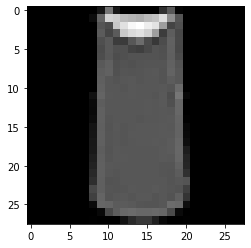

In [ ]:
plt.imshow(x_train[2],'gray')
print(y_train[2])

In [ ]:
# Reshape Dataset
x_train = x_train.reshape(num_train, height * width)
x_test = x_test.reshape(num_test, height * width)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

In [ ]:
# Normalizar datos
x_train = x_train / 255
x_test = x_test / 255

##One-Hot Encoding Clases

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_class = y_train.shape[1]

print(y_train.shape)
print(y_test.shape)
print(num_class)

(60000, 10)
(10000, 10)
10


##Autoencoder 1

### Estructura AutoEncoder1

In [ ]:
input_img = Input(shape=(height * width,))    #Entrada de 28x28 = 784

encoded = Dense(height * width//2, activation='relu')(input_img)   #Capa de 784/2 = 392
encoded = Dense(height * width//4, activation='relu')(encoded)    #Capa de 784/ = 196
encoded = Dense(height * width//6, activation='relu')(encoded)    #Capa de 784/8 = 130
encoded = Dense(height * width//8, activation='relu')(encoded)    #Capa de 784/8 = 98

y = Dense(height * width//392, activation='relu')(encoded)    #Capa latente de 784/392 = 2

decoded = Dense(height * width//8, activation='relu')(y)    #Capa de 784/8 = 98
decoded = Dense(height * width//6, activation='relu')(decoded)    #Capa de 784/6 = 130
decoded = Dense(height * width//4, activation='relu')(decoded)    #Capa de 784/4 = 196
decoded = Dense(height * width//2, activation='relu')(decoded)    #Capa de 784/2 = 392

z = Dense(height * width, activation='sigmoid')(decoded)    #Salida de 28x28 = 784

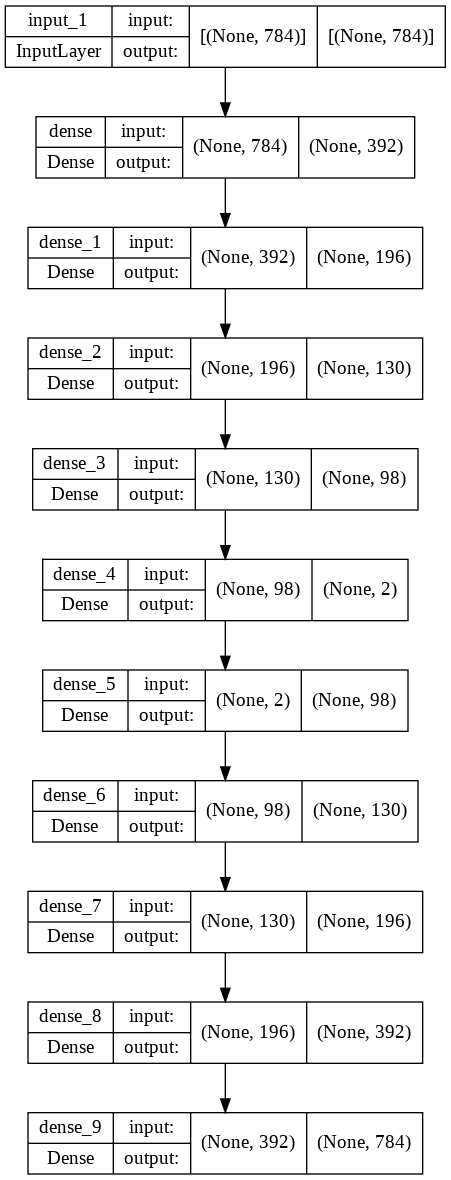

In [ ]:
model = Model(input_img, z)   #Modelo completo del Autoencoder

model.compile(optimizer='adadelta', loss='mse')

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='Autoencoder.png', show_shapes=True)

### Entrenamiento AutoEncoder1

In [ ]:
history1 = model.fit(x_train, x_train,
      epochs=500,
      batch_size=128,
      shuffle=True,
      validation_data=(x_test, x_test))

Epoch 1/500
469/469 [==============================] - 5s 5ms/step - loss: 0.1704 - val_loss: 0.1696
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1704 - val_loss: 0.1696
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1704 - val_loss: 0.1696
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.1696
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.1696
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.1695
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.1695
Epoch 8/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.1695
Epoch 9/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.1695
Epoch 10/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1702 - val_lo

### Visualización Pérdida AutoEncoder1

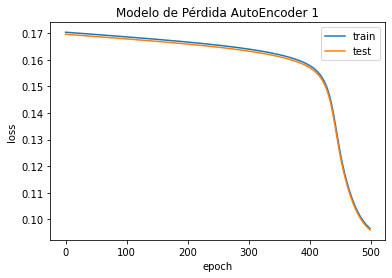

In [ ]:
plt.plot(history1.history['loss']), plt.plot(history1.history['val_loss']), plt.title('Modelo de Pérdida AutoEncoder 1'), plt.xlabel('epoch'), plt.ylabel('loss'), plt.legend(['train','test'], loc = 'upper right')
plt.show()

##Capa Clasificadora

### Estructura Etapa Clasificadora

In [ ]:
out = Dense(10, activation='softmax')(y)   #Con 10 neuronas de salida, apilada a la capa latente
reduced = Model(input_img, out)   #Modelo completo del Autoencoder + la capa clasificadora
reduced.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 130)               25610     
                                                                 
 dense_3 (Dense)             (None, 98)                12838     
                                                                 
 dense_4 (Dense)             (None, 2)                 198       
                                                                 
 dense_10 (Dense)            (None, 10)                30  

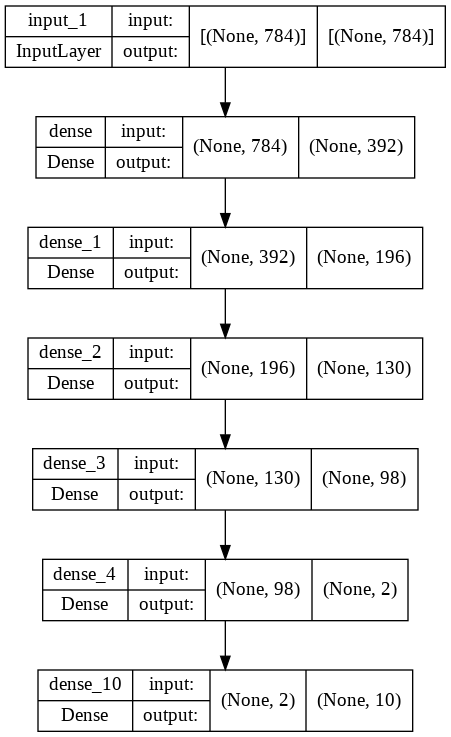

In [ ]:
reduced.summary()
plot_model(reduced, to_file='Clasificador.png', show_shapes=True)

###Entrenamiento Etapa Clasificadora

In [ ]:
historyc = reduced.fit(x_train, y_train,
      epochs=500,
      batch_size=128,
      shuffle=True,
      validation_data=(x_test, y_test))

Epoch 1/500
469/469 [==============================] - 3s 4ms/step - loss: 1.8853 - accuracy: 0.2309 - val_loss: 1.6888 - val_accuracy: 0.3438
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 1.5773 - accuracy: 0.3661 - val_loss: 1.5274 - val_accuracy: 0.3783
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 1.5052 - accuracy: 0.3784 - val_loss: 1.4913 - val_accuracy: 0.3797
Epoch 4/500
469/469 [==============================] - 2s 3ms/step - loss: 1.4707 - accuracy: 0.3807 - val_loss: 1.4658 - val_accuracy: 0.3842
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 1.4497 - accuracy: 0.3821 - val_loss: 1.4520 - val_accuracy: 0.3827
Epoch 6/500
469/469 [==============================] - 2s 3ms/step - loss: 1.4344 - accuracy: 0.3853 - val_loss: 1.4383 - val_accuracy: 0.3854
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 1.3245 - accuracy: 0.4446 - val_loss: 1.2469 - val_accuracy: 0.4767

### Visualización Pérdida Etapa Clasificadora

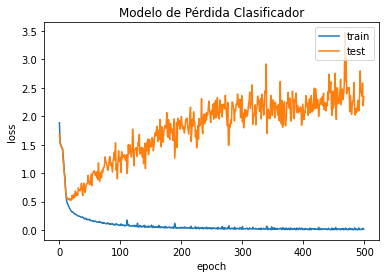

In [ ]:
plt.plot(historyc.history['loss']), plt.plot(historyc.history['val_loss']), plt.title('Modelo de Pérdida Clasificador'), plt.xlabel('epoch'), plt.ylabel('loss'), plt.legend(['train','test'], loc = 'upper right')
plt.show()

## Evaluación del modelo

In [ ]:
scores = reduced.evaluate(x_test, y_test, verbose=1) 
print("Accuracy: ", scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.3373 - accuracy: 0.8883
Accuracy:  0.8883000016212463


In [ ]:
outputTrain=reduced.predict(x_test)

outputTrain2 = (outputTrain > 0.51) * 1
print(outputTrain2)

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mtr = confusion_matrix(y_test.argmax(axis=1),outputTrain.argmax(axis=1))
print(conf_mtr)

[[834   0  10  22   3   1 124   0   6   0]
 [  5 974   1  13   4   0   1   1   1   0]
 [ 18   0 829   8  67   0  76   0   2   0]
 [ 25   8   8 869  34   0  52   0   4   0]
 [  0   0  97  13 823   0  66   0   1   0]
 [  0   0   0   1   0 959   2  24   1  13]
 [121   0  79  21  72   0 699   0   8   0]
 [  0   0   0   0   0   4   1 974   0  21]
 [  1   0   3   2   3   1  12   3 974   1]
 [  1   0   0   1   0   5   1  44   0 948]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

      plt.figure(figsize = (8,8))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.title('MATRIZ DE CONFUSIÓN SIN NORMALIZAR')
      plt.ylabel('ORIGINAL')
      plt.xlabel('PREDICCIONES')

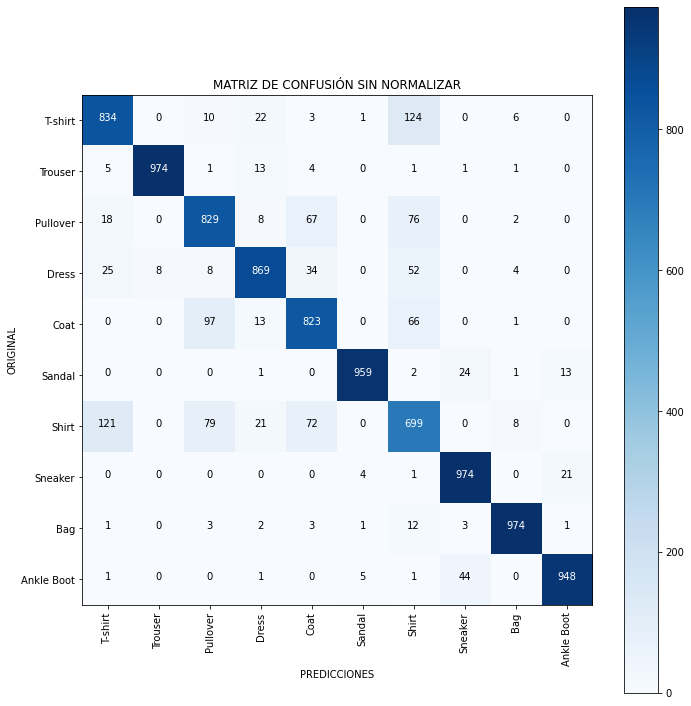

In [ ]:
num_classes = y_test.shape
plot_confusion_matrix(conf_mtr, num_classes)

## Verificación Modelo Final

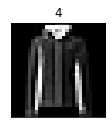

In [ ]:
n = 10  #Cantidad de digitos que se van a mostrar
plt.figure(figsize=(20, 4))

ax =plt.subplot(2, n, 1)
plt.imshow(x_test[6].reshape(28, 28))     #Se muestra la imagen en la posición 6
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(outputTrain.argmax(axis=1)[6])    #Predicción de la posición 6 
plt.show()